In [1]:
# import Framework

import sqlite3
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ArgeLenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ArgeLenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ArgeLenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ArgeLenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ArgeLenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Data review

In [2]:
# Veri seti çekilir
df = pd.read_csv('data.csv')
df

,Comment_Id,Product_Id,Comment_Content,Comment_Evaluation
0,6244,266,cok guzel yaaaa,5
1,11562,523,Çok beğendik kaliteli güzel bi kumaşı var,5
2,30665,1602,Çok güzel 👍🏻,5
3,23735,1202,"Hızlı teslimat.Yumuşacık,rahat ve bol gömlek",5
4,35448,2177,hiç guzel degil,1
...,...,...,...,...
43918,28507,1490,Süper 👏🏻👏🏻👏🏻 kalıbı duruşu,5
43919,28533,1491,Altıyla üstü arasında sanki 2 beden var. Üstün...,2
43920,19050,943,Dokusu harika yumaşacık harika tavsiye ediyorum,5
43921,19457,966,Ürün gayet güzeldi,5


In [3]:
# gereksiz sutunlar silinir
df.drop('Comment_Id', inplace=True, axis=1)
df.drop('Product_Id', inplace=True, axis=1)

In [4]:
df

,Comment_Content,Comment_Evaluation
0,cok guzel yaaaa,5
1,Çok beğendik kaliteli güzel bi kumaşı var,5
2,Çok güzel 👍🏻,5
3,"Hızlı teslimat.Yumuşacık,rahat ve bol gömlek",5
4,hiç guzel degil,1
...,...,...
43918,Süper 👏🏻👏🏻👏🏻 kalıbı duruşu,5
43919,Altıyla üstü arasında sanki 2 beden var. Üstün...,2
43920,Dokusu harika yumaşacık harika tavsiye ediyorum,5
43921,Ürün gayet güzeldi,5


<AxesSubplot:ylabel='Comment_Evaluation'>

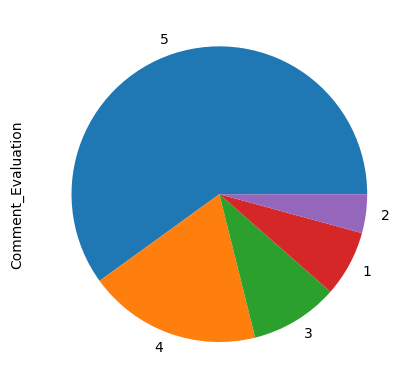

In [5]:
# yorum yıldızlarının gorsellestirilmesi
df['Comment_Evaluation'].value_counts().plot.pie()

In [6]:
df.drop(df.loc[df['Comment_Evaluation']==5][3000:22000].index, inplace=True)
df.drop(df.loc[df['Comment_Evaluation']==4][1000:3000].index, inplace=True)

<AxesSubplot:ylabel='Comment_Evaluation'>

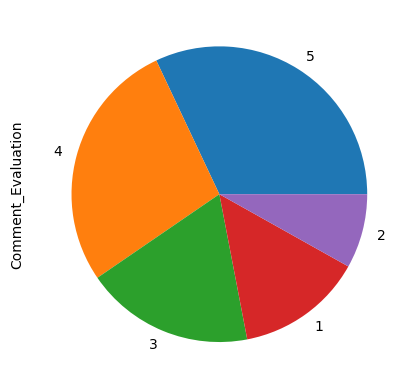

In [7]:
df['Comment_Evaluation'].value_counts().plot.pie()

In [8]:
df['Comment_Evaluation'].count()

22923

### Data processing

**0: Negative, 1: Positive**

In [9]:
df.loc[(df["Comment_Evaluation"]<=3), "Comment_Evaluation"]=0
df

,Comment_Content,Comment_Evaluation
0,cok guzel yaaaa,5
1,Çok beğendik kaliteli güzel bi kumaşı var,5
2,Çok güzel 👍🏻,5
3,"Hızlı teslimat.Yumuşacık,rahat ve bol gömlek",5
4,hiç guzel degil,0
...,...,...
43918,Süper 👏🏻👏🏻👏🏻 kalıbı duruşu,5
43919,Altıyla üstü arasında sanki 2 beden var. Üstün...,0
43920,Dokusu harika yumaşacık harika tavsiye ediyorum,5
43921,Ürün gayet güzeldi,5


In [10]:
df.loc[(df["Comment_Evaluation"]>3), "Comment_Evaluation"]=1
df

,Comment_Content,Comment_Evaluation
0,cok guzel yaaaa,1
1,Çok beğendik kaliteli güzel bi kumaşı var,1
2,Çok güzel 👍🏻,1
3,"Hızlı teslimat.Yumuşacık,rahat ve bol gömlek",1
4,hiç guzel degil,0
...,...,...
43918,Süper 👏🏻👏🏻👏🏻 kalıbı duruşu,1
43919,Altıyla üstü arasında sanki 2 beden var. Üstün...,0
43920,Dokusu harika yumaşacık harika tavsiye ediyorum,1
43921,Ürün gayet güzeldi,1


In [11]:
# Kelimeleri ayırma işlemleri ve sayısını/ortalamasını bulma
df['word_count'] = df['Comment_Content'].apply(lambda x: len(str(x).split()))
print(df[df['Comment_Evaluation']==1]['word_count'].mean()) #Positive comment
print(df[df['Comment_Evaluation']==0]['word_count'].mean()) #Negative comment

9.10180166984034
11.193332614089977


In [12]:
# Karakterleri ayırma işlemleri ve sayısını/ortalamasını bulma
df['char_count'] = df['Comment_Content'].apply(lambda x: len(str(x)))
print(df[df['Comment_Evaluation']==1]['char_count'].mean()) #Positive comment
print(df[df['Comment_Evaluation']==0]['char_count'].mean()) #Negative comment

56.43327962501831
70.73729636422483


In [13]:
# Regular Expression İşlemleri
def preprocess(text):
    text = text.lower() # Küçük harfe dönüştür 
    text = text.strip()  # Boşlukları silme işlemi
    text = re.compile('<.*?>').sub('', text) # HTML taglarını kaldır
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Noktalama işaretlerini boşlukla değiştir
    text = re.sub('\s+', ' ', text)  #Tab - boşluk karakterlerini boşlukla değiştir
    text = re.sub(r'\[[0-9]*\]',' ',text) # Sayısal karakterleri kaldır
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text) #\s boşlukları eşleştir ve kaldır
    
    return text

In [14]:
#STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

 
# Stemmer İşlemleri
# Stemming algoritmaları, ekli bir kelimede bulunabilen ortak ön eklerin ve son eklerin 
# bir listesini dikkate alarak kelimenin başlangıcını veya sonunu kesmeye çalışır.
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)


# Lemmatizer işlemleri
# Lemmatization ise kelimelerin morfolojik analizini dikkate alır.
wl = WordNetLemmatizer()
 
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)


In [15]:
#Final İşlemleri
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df['clean_text'] = df['Comment_Content'].apply(lambda x: finalpreprocess(x))
df.head()

,Comment_Content,Comment_Evaluation,word_count,char_count,clean_text
0,cok guzel yaaaa,1,3,15,cok guzel yaaaa
1,Çok beğendik kaliteli güzel bi kumaşı var,1,7,41,çok beğendik kaliteli güzel bi kumaşı var
2,Çok güzel 👍🏻,1,3,12,çok güzel
3,"Hızlı teslimat.Yumuşacık,rahat ve bol gömlek",1,5,44,hızlı teslimat yumuşacık rahat bol gömlek
4,hiç guzel degil,0,3,15,hiç guzel degil


In [16]:
# Word2vec modelleme işlemleri
df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors)) 

# Word2Vec tarafından oluşturulan kelime vektörlerinden vektörlere/sayılara dönüştürmek işlemleri
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [17]:
# Kelimeleri/Sözcükleri vektöre dönüştürme işlemleri
X_train, X_val, y_train, y_val = train_test_split(df["clean_text"],
                                                  df["Comment_Evaluation"],
                                                  test_size=0.2,
                                                  shuffle=True)

# Word-Tokenize işlemleri
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)

# Word2Vec -> Dönüşüm işlemleri
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

### Model.fit() Train

In [18]:
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

LogisticRegression(C=10, solver='liblinear')

In [19]:
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

In [20]:
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc) 

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1858
           1       0.85      0.87      0.86      2727

    accuracy                           0.83      4585
   macro avg       0.82      0.82      0.82      4585
weighted avg       0.83      0.83      0.83      4585

Confusion Matrix: [[1432  426]
 [ 356 2371]]
AUC: 0.8970102428255026


In [21]:
# Naive Bayes Algoritma İşlemleri - Modelleme
# https://www.veribilimiokulu.com/naive-bayes-yontemiyle-siniflandirma-classification-with-naive-bayes-python-ile-uygulama/
# https://miracozturk.com/python-ile-siniflandirma-analizleri-naive-bayes-algoritmasi/
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

MultinomialNB()

In [22]:
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

In [23]:
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.85      0.66      0.74      1858
           1       0.80      0.92      0.86      2727

    accuracy                           0.82      4585
   macro avg       0.83      0.79      0.80      4585
weighted avg       0.82      0.82      0.81      4585

Confusion Matrix: [[1223  635]
 [ 209 2518]]
AUC: 0.8974507605048271


In [24]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [29]:
d = {'Comment_Content': ["hiç beğenmedim", "babama da almak istiyorum", "ürünü çok beğendim", ""]}
df_test=pd.DataFrame(d)


df_test['clean_text'] = df_test['Comment_Content'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['clean_text'] 
df_test.drop('Comment_Content', inplace=True, axis=1)
X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector
y_predict = lr_tfidf.predict(X_vector)      #use the trained model on X_vector
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
df_test['pred_prob']= y_prob
df_test['Pred']= y_predict
df_test['Pred'] = np.where(df_test['Pred'] == 0,'Negative (-)', "Positive (+)")
print_full(df_test)

                  clean_text            pred_prob          Pred
0             hiç beğenmedim                 0.00  Negative (-)
1  babama da almak istiyorum                 0.22  Negative (-)
2         ürünü çok beğendim                 0.91  Positive (+)


### Test